In [64]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
import gmaps
import walkscore
import scipy.stats as st
from scipy.stats import linregress
from pandas import json_normalize

from config import api_key
# Census API Key
#from config import api_key
#c = Census(api_key, year=2013)


In [65]:
#Read in master dataset and create dataframe to work with
csv_path="master_dataset.csv"
master_df=pd.read_csv(csv_path)
master_df=pd.DataFrame(master_df)
master_df['Poverty Rate(%)'] = 100 * (master_df['Poverty Count'])/(master_df['Population'])
master_df['Unemployment Rate (%)'] = 100 * (master_df['Unemployment'])/(master_df['Population'])
master_df['price_tag'].unique()

array(['$$', '$', nan, '$$$$', '$$$'], dtype=object)

In [66]:
xy=[]
error=[]
master_df['price_tag_value']=''
for index, row in master_df.iterrows():
    try:
        if row['price_tag']=='$':
            x=1
            xy.append(x)
        elif row['price_tag']=='$$':
            x=2
            xy.append(x)
        elif row['price_tag']=='$$$':
            x=3
            xy.append(x) 
        elif row['price_tag']=='$$$$':
            x=4
            xy.append(x)
        elif row['price_tag']=='$$$$$':
            x=5
            xy.append(x)
        else:
            x=""
            xy.append(x)
    except IndexError as error:
        xy.append("")

len(xy)
        
    

# xy=[]
# for index, row in hotel_df.iterrows():
#     x=str(row['Lat']) + ', ' + str(row['Lon'])
#     xy.append(x)

5381

In [67]:
master_df['price_tag_value']=xy
master_df.head(25)
master_df_v2=pd.DataFrame(master_df)
master_df_v2.to_csv('master_dataset_v2.csv')

In [68]:
#Find average yelp rating for dataset
yelp_rat=master_df['yelp_rating']
yelp_rat_mean=yelp_rat.mean()

In [69]:
# Get average yelp rating by restuarant chain
rest_rat=master_df.groupby(['name'])['yelp_rating']
rest_rat_mean=pd.DataFrame(rest_rat.mean())
rest_rat_med =rest_rat.median()
rest_rat_var = rest_rat.var()
rest_rat_std = rest_rat.std()
rest_rat_sem = rest_rat.sem()
rest_rat_std


name
Chipotle         0.579355
Panda Express    0.545410
Red Lobster      0.412003
Name: yelp_rating, dtype: float64

In [ ]:
#Will start by complining standard data (mean, median, std, etc...) for data set as whole before breaking into categories

In [7]:
#Per Capita income aggreate around yelp rating
yelp_rat_pci=master_df.groupby(['name'])['Per Capita Income']
yelp_rat_pci_mean=pd.DataFrame(yelp_rat_pci.mean())
yelp_rat_pci_mean
yelp_rat_pci_med =yelp_rat_pci.median()
yelp_rat_pci_var = yelp_rat_pci.var()
yelp_rat_pci_std = yelp_rat_pci.std()
yelp_rat_pci_sem = yelp_rat_pci.sem()
yelp_rat_pci_std

name
Chipotle         18852.615989
Panda Express    14607.351187
Red Lobster      10152.725291
Name: Per Capita Income, dtype: float64

In [8]:
#Household income aggreate around yelp rating
yelp_rat_gb=master_df.groupby(['name'])['Household Income']
yelp_rat_house_mean=pd.DataFrame(yelp_rat_gb.mean())
yelp_rat_house_med =yelp_rat_gb.median()
yelp_rat_house_var = yelp_rat_gb.var()
yelp_rat_house_std = yelp_rat_gb.std()
yelp_rat_house_sem = yelp_rat_gb.sem()
yelp_rat_house_mean

,Household Income
name,
Chipotle,76445.525483
Panda Express,69038.494516
Red Lobster,61411.897695


In [9]:
#Median age aggreate around restauerant
yelp_rat_age=master_df.groupby(['name'])['Median Age']
yelp_rat_age_mean=pd.DataFrame(yelp_rat_age.mean())
yelp_rat_age_med =yelp_rat_age.median()
yelp_rat_age_var = yelp_rat_age.var()
yelp_rat_age_std = yelp_rat_age.std()
yelp_rat_age_sem = yelp_rat_age.sem()
yelp_rat_age_mean

,Median Age
name,
Chipotle,37.879151
Panda Express,36.792322
Red Lobster,38.077666


In [10]:
#Poverty Rate aggreate around restauerant
yelp_rat_pov=master_df.groupby(['name'])['Poverty Rate(%)']
yelp_rat_pov_mean=pd.DataFrame(yelp_rat_pov.mean())
yelp_rat_pov_med =yelp_rat_pov.median()
yelp_rat_pov_var = yelp_rat_pov.var()
yelp_rat_pov_std = yelp_rat_pov.std()
yelp_rat_pov_sem = yelp_rat_pov.sem()
yelp_rat_pov_mean

,Poverty Rate(%)
name,
Chipotle,11.615933
Panda Express,13.014313
Red Lobster,13.460430


In [11]:
#Unemployement Rate aggreate around restauerant
yelp_rat_unem=master_df.groupby(['name'])['Unemployment Rate (%)']
yelp_rat_unem_mean=pd.DataFrame(yelp_rat_unem.mean())
yelp_rat_unem_med =yelp_rat_unem.median()
yelp_rat_unem_var = yelp_rat_unem.var()
yelp_rat_unem_std = yelp_rat_unem.std()
yelp_rat_unem_sem = yelp_rat_unem.sem()
yelp_rat_unem_mean

,Unemployment Rate (%)
name,
Chipotle,2.755859
Panda Express,2.906445
Red Lobster,2.859695


In [74]:
import statsmodels.api as sm

In [77]:
x = pan_df[["Population"]]
y = pan_df["yelp_rating"]
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            yelp_rating   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              6408.
Date:                Wed, 13 May 2020   Prob (F-statistic):                        0.00
Time:                        20:37:49   Log-Likelihood:                         -3348.5
No. Observations:                1999   AIC:                                      6699.
Df Residuals:                    1998   BIC:                                      6705.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population  5.404e-05   6.75e-07     80.052      0.000    5.27e-05    5.54e-05
==============================================================================
Omnibus:                      102.511   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.697
Skew:                          -0.451   Prob(JB):                     1.89e-33
Kurtosis:                       3.998   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# #Price tage value aggreate around yelp rating  Need to look into further if we want to use
# yelp_rat_pt=master_df.groupby(['yelp_rating'])['price_tag_value']
# yelp_rat_pt_mean=pd.DataFrame(yelp_rat_pt.mean())
# yelp_rat_pt_med =yelp_rat_pt.median()
# yelp_rat_pt_var = yelp_rat_pt.var()
# yelp_rat_pt_std = yelp_rat_pt.std()
# yelp_rat_pt_sem = yelp_rat_pt.sem()
# yelp_rat_pt_mean

In [33]:
#End looking at values to entire data set.  Now to split into by restaurants
pan_df=master_df[master_df['name']=='Panda Express']
chip_df=master_df[master_df['name']=='Chipotle']
red_lob_df=master_df[master_df['name']=='Red Lobster']
len(chip_df)

2590

In [14]:
#Average values for panda restaurant chain
pan_av_rat=pan_df['yelp_rating'].mean()
pan_av_rat_std=pan_df['yelp_rating'].std()
pan_av_hi=pan_df['Household Income'].mean()
pan_av_hi_std=pan_df['Household Income'].std()
pan_av_pci=pan_df['Per Capita Income'].mean()
pan_av_pci_std=pan_df['Per Capita Income'].std()
pan_av_medage=pan_df['Median Age'].mean()
pan_av_medage_std=pan_df['Median Age'].std()
pan_av_pov=pan_df['Poverty Rate(%)'].mean()
pan_av_pov_std=pan_df['Poverty Rate(%)'].std()
pan_av_unem=pan_df['Unemployment Rate (%)'].mean()
pan_av_unem_std=pan_df['Unemployment Rate (%)'].std()
pan_av_unem_std

1.154298999841756

In [15]:
#Average values for chipotle restaurant chain
chip_av_rat=chip_df['yelp_rating'].mean()
chip_av_rat_std=chip_df['yelp_rating'].std()
chip_av_hi=chip_df['Household Income'].mean()
chip_av_hi_std=chip_df['Household Income'].std()
chip_av_pci=chip_df['Per Capita Income'].mean()
chip_av_pci_std=chip_df['Per Capita Income'].std()
chip_av_medage=chip_df['Median Age'].mean()
chip_av_medage_std=chip_df['Median Age'].std()
chip_av_pov=chip_df['Poverty Rate(%)'].mean()
chip_av_pov_std=chip_df['Poverty Rate(%)'].std()
chip_av_unem=chip_df['Unemployment Rate (%)'].mean()
chip_av_unem_std=chip_df['Unemployment Rate (%)'].std()
chip_av_unem_std

1.0727820329828828

In [16]:
#Average values for red lobster restaurant chain
red_lob_av_rat=red_lob_df['yelp_rating'].mean()
red_lob_av_rat_std=red_lob_df['yelp_rating'].std()
red_lob_hi=red_lob_df['Household Income'].mean()
red_lob_hi_std=red_lob_df['Household Income'].std()
red_lob_pci=red_lob_df['Per Capita Income'].mean()
red_lob_pci_std=red_lob_df['Per Capita Income'].std()
red_lob_medage=red_lob_df['Median Age'].mean()
red_lob_medage_std=red_lob_df['Median Age'].std()
red_lob_pov=red_lob_df['Poverty Rate(%)'].mean()
red_lob_pov_std=red_lob_df['Poverty Rate(%)'].std()
red_lob_unem=red_lob_df['Unemployment Rate (%)'].mean()
red_lob_unem_std=red_lob_df['Unemployment Rate (%)'].std()
red_lob_unem_std

1.0648510727078788

In [17]:
stat_comp=pd.DataFrame(rest_rat_mean)
stat_comp['rating_std']=rest_rat_std
stat_comp['Mean Per Capita Income']=yelp_rat_pci_mean
stat_comp['Per Capita Income STD']=yelp_rat_pci_std
stat_comp['Mean Household Income']=yelp_rat_house_mean
stat_comp['Household Income STD']=yelp_rat_house_std
stat_comp['Mean Median Age']=yelp_rat_age_mean
stat_comp['Median Age STD']=yelp_rat_age_std
stat_comp['Mean Poverty Rate']=yelp_rat_pov_mean
stat_comp['Poverty Rate STD']=yelp_rat_pov_std
stat_comp['Mean Unemployement Rate']=yelp_rat_unem_mean
stat_comp['Unemployement Rate STD']=yelp_rat_unem_std
stat_comp_df=pd.DataFrame(stat_comp)
stat_comp_df.to_csv('Aggregated Restaurant comparison.csv')


In [20]:
pan_df.head()

,Unnamed: 0,zip_code,yelp_rating,price_tag,review_count,lat,lng,name,storeid,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Unemployment,Poverty Rate(%),Unemployment Rate (%),price_tag_value
0,0,91210,2.0,$$,41.0,34.1452,-118.2594,Panda Express,1,689,35.2,159500,93135,188,21,27.285922,3.047896,2
1,1,91210,2.0,$,25.0,34.1451,-118.2589,Panda Express,161,689,35.2,159500,93135,188,21,27.285922,3.047896,1
3,3,30096,3.5,$,58.0,33.9559,-84.1318,Panda Express,2,67959,35.1,53514,28011,8901,1677,13.097603,2.467664,1
6,6,94965,3.0,$,67.0,37.8719,-122.5092,Panda Express,3,11408,51.1,103424,83637,1197,243,10.492637,2.130084,1
7,7,85042,NaN,NaN,NaN,33.3785,-112.0287,Panda Express,4,46570,32.1,53824,23442,8510,1880,18.273567,4.036934,


In [34]:
#Create scatter plots and linear regression pearson -r value to calculate correlation between yelp rating and census data/walk score data.
# Remove those rows with NaN yelp rating
pan_df=pan_df[pan_df['yelp_rating'].notna()]
chip_df=chip_df[chip_df['yelp_rating'].notna()]
red_lob_df=red_lob_df[red_lob_df['yelp_rating'].notna()]
len(red_lob_df)


694

In [ ]:
### Panda Express linear regression information

In [72]:
# All panda express yelp ratings compared to population
x_pan_pop=pan_df['Population']
y_pan=pan_df['yelp_rating']
z_pan=pan_df['review_count']
#correlation=st.pearsonr(x_pan_pop, y_pan, z_pan)
print(f"The correlation between both factors is {round(correlation[0],2)}")
cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_pan_pop + z_pan, y_pan)
cp_fit = cp_slope * x_pan_pop + cp_int

# plt.scatter(x_pan_pop,y_pan)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Population')
# plt.ylabel("yelp rating")
# plt.title("Population by yelp rating")
# plt.show()

The correlation between both factors is -0.07


The correlation between both factors is 0.04


ValueError: x and y must have same first dimension, but have shapes (1,) and (1999,)

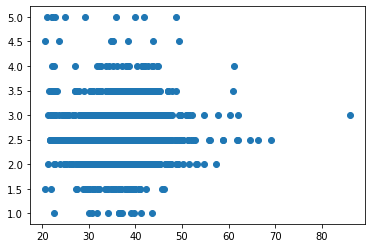

In [43]:
# All panda express yelp ratings compared to median aga
x_pan_age=pan_df['Median Age']
y_pan=pan_df['yelp_rating']
correlation=st.pearsonr(x_pan_age, y_pan)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_pan_age, y_pan)
# cp_fit = cp_slope * x_pan_age + cp_int

# plt.scatter(x_pan_age,y_pan)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Median Age')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Median age")
# plt.show()

In [45]:
# All panda express yelp ratings compared to Household income
x_pan_hi=pan_df['Household Income']
y_pan=pan_df['yelp_rating']
correlation=st.pearsonr(x_pan_hi, y_pan)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_pan_hi, y_pan)
# cp_fit = cp_slope * x_pan_hi + cp_int

# plt.scatter(x_pan_hi,y_pan)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Household income')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Household income")
# plt.show()

The correlation between both factors is 0.02


In [46]:
# All panda express yelp ratings compared to per capita income
x_pan_pci=pan_df['Per Capita Income']
y_pan=pan_df['yelp_rating']
correlation=st.pearsonr(x_pan_pci, y_pan)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_pan_pci, y_pan)
# cp_fit = cp_slope * x_pan_pci + cp_int

# plt.scatter(x_pan_pci,y_pan)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Per Capita Income')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Per Capita Income")
# plt.show()

The correlation between both factors is 0.08


In [47]:
# All panda express yelp ratings compared to poverty rate
x_pan_pov=pan_df['Poverty Rate(%)']
y_pan=pan_df['yelp_rating']
correlation=st.pearsonr(x_pan_pov, y_pan)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_pan_pov, y_pan)
# cp_fit = cp_slope * x_pan_pov + cp_int

# plt.scatter(x_pan_pci,y_pan)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Poverty rate')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Poverty rate")
# plt.show()

The correlation between both factors is -0.04


In [49]:
# All panda express yelp ratings compared to unemployement rate
x_pan_unem=pan_df['Unemployment Rate (%)']
y_pan=pan_df['yelp_rating']
correlation=st.pearsonr(x_pan_unem, y_pan)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_pan_unem, y_pan)
# cp_fit = cp_slope * x_pan_unem + cp_int

# plt.scatter(x_pan_unem,y_pan)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Unemployement Rate')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Unemployement rate")
# plt.show()

The correlation between both factors is -0.04


In [ ]:
### Chipotle linear regression analysis

In [51]:
#chipotle rating and population
x_chip_pop=chip_df['Population']
y_chip=chip_df['yelp_rating']
correlation=st.pearsonr(x_chip_pop, y_chip)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_chip_pop, y_chip)
# cp_fit = cp_slope * x_chip_pop + cp_int

# plt.scatter(x_chip_pop,y_chip)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Population')
# plt.ylabel("yelp rating")
# plt.title("Population by yelp rating")
# plt.show()

The correlation between both factors is -0.05


In [52]:
# All chipotle express yelp ratings compared to median ag
x_chip_age=chip_df['Median Age']
y_chip=chip_df['yelp_rating']
correlation=st.pearsonr(x_chip_age, y_chip)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_chip_age, y_chip)
# cp_fit = cp_slope * x_chip_age + cp_int

# plt.scatter(x_chip_age,y_chip)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Median Age')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Median age")
# plt.show()

The correlation between both factors is -0.03


In [53]:
# All chipotle express yelp ratings compared to Household income
x_chip_hi=chip_df['Household Income']
y_chip=chip_df['yelp_rating']
correlation=st.pearsonr(x_chip_hi, y_chip)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_chip_hi, y_chip)
# cp_fit = cp_slope * x_chip_hi + cp_int

# plt.scatter(x_chip_hi,y_chip)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Household income')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Household income")
# plt.show()

The correlation between both factors is -0.15


In [54]:
# All chipotle express yelp ratings compared to per capita income
x_chip_pci=chip_df['Per Capita Income']
y_chip=chip_df['yelp_rating']
correlation=st.pearsonr(x_chip_pci, y_chip)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_chip_pci, y_chip)
# cp_fit = cp_slope * x_chip_pci + cp_int

# plt.scatter(x_chip_pci,y_chip)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Per Capita Income')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Per Capita Income")
# plt.show()

The correlation between both factors is -0.08


In [55]:
# All chipotle express yelp ratings compared to poverty rate
x_chip_pov=chip_df['Poverty Rate(%)']
y_chip=chip_df['yelp_rating']
correlation=st.pearsonr(x_chip_pov, y_chip)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_chip_pov, y_chip)
# cp_fit = cp_slope * x_chip_pov + cp_int

# plt.scatter(x_chip_pci,y_chip)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Poverty rate')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Poverty rate")
# plt.show()

The correlation between both factors is 0.09


In [56]:
# All chipotle express yelp ratings compared to unemployement rate
x_chip_unem=chip_df['Unemployment Rate (%)']
y_chip=chip_df['yelp_rating']
correlation=st.pearsonr(x_chip_unem, y_chip)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_chip_unem, y_chip)
# cp_fit = cp_slope * x_chip_unem + cp_int

# plt.scatter(x_chip_unem,y_chip)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Unemployement Rate')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Unemployement rate")
# plt.show()

The correlation between both factors is -0.04


In [ ]:
### Comparison for red lobster chain

In [57]:
# All red lobster yelp ratings compared to population
x_red_lob_pop=red_lob_df['Population']
y_red_lob=red_lob_df['yelp_rating']
correlation=st.pearsonr(x_red_lob_pop, y_red_lob)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_red_lob_pop, y_red_lob)
# cp_fit = cp_slope * x_red_lob_pop + cp_int

# plt.scatter(x_red_lob_pop,y_red_lob)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Population')
# plt.ylabel("yelp rating")
# plt.title("Population by yelp rating")
# plt.show()

The correlation between both factors is -0.04


In [58]:
# All red lobster express yelp ratings compared to median age
x_red_lob_age=red_lob_df['Median Age']
y_red_lob=red_lob_df['yelp_rating']
correlation=st.pearsonr(x_red_lob_age, y_red_lob)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_red_lob_age, y_red_lob)
# cp_fit = cp_slope * x_red_lob_age + cp_int

# plt.scatter(x_red_lob_age,y_red_lob)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Median Age')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Median age")
# plt.show()

The correlation between both factors is 0.08


In [60]:
# All red_lobotle express yelp ratings compared to Household income
x_red_lob_hi=red_lob_df['Household Income']
y_red_lob=red_lob_df['yelp_rating']
correlation=st.pearsonr(x_red_lob_hi, y_red_lob)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_red_lob_hi, y_red_lob)
# cp_fit = cp_slope * x_red_lob_hi + cp_int

# plt.scatter(x_red_lob_hi,y_red_lob)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Household income')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Household income")
# plt.show()

The correlation between both factors is -0.05


In [61]:
# All red lobster yelp ratings compared to per capita income
x_red_lob_pci=red_lob_df['Per Capita Income']
y_red_lob=red_lob_df['yelp_rating']
correlation=st.pearsonr(x_red_lob_pci, y_red_lob)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_red_lob_pci, y_red_lob)
# cp_fit = cp_slope * x_red_lob_pci + cp_int

# plt.scatter(x_red_lob_pci,y_red_lob)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Per Capita Income')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Per Capita Income")
# plt.show()

The correlation between both factors is -0.01


In [62]:
# All red lobster yelp ratings compared to poverty rate
x_red_lob_pov=red_lob_df['Poverty Rate(%)']
y_red_lob=red_lob_df['yelp_rating']
correlation=st.pearsonr(x_red_lob_pov, y_red_lob)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_red_lob_pov, y_red_lob)
# cp_fit = cp_slope * x_red_lob_pov + cp_int

# plt.scatter(x_red_lob_pci,y_red_lob)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Poverty rate')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Poverty rate")
# plt.show()

The correlation between both factors is -0.02


In [63]:
# All red lobster yelp ratings compared to unemployement rate
x_red_lob_unem=red_lob_df['Unemployment Rate (%)']
y_red_lob=red_lob_df['yelp_rating']
correlation=st.pearsonr(x_red_lob_unem, y_red_lob)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# cp_slope, cp_int, cp_r, vc_p, cp_std_err = st.linregress(x_red_lob_unem, y_red_lob)
# cp_fit = cp_slope * x_red_lob_unem + cp_int

# plt.scatter(x_red_lob_unem,y_red_lob)
# plt.plot(x,cp_fit,"--")
# plt.xlabel('Unemployement Rate')
# plt.ylabel("yelp rating")
# plt.title("Yelp rating by Unemployement rate")
# plt.show()

The correlation between both factors is -0.07
